# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import os
from scipy.stats import linregress
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [2]:
# Range of latitudes and longitudes
lat_range=(-90,90)
lng_range=(-180,180)

## Generate Cities List

In [3]:
# List for holding randomly generated latitude, longitude and cities
lat_lngs = []
cities = []

#randomly generate 1500 latitudes range from -90 to 90
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#randomly generate 1500 longitudes range from -180 to 180
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# Create a set of random latitudes and longitudes combinations
lat_lngs = zip(lats, lngs)

# Loop through the lat_lngs list, identify nearest city for each lat, lng combination using the citypy library
#return the city_name
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a the cities list
    if city not in cities:
        cities.append(city)

#Check the number of cities in the list to confirm there are at least 500 unique cities based on latitude and longitude.
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#picked a random city ostrovnoy and perform a test on the API calls
#Call current(12/09/2021) weather data for city ostrovnoy

city_name="ostrovnoy"
API_key=weather_api_key
unit="metric"
ostrovnoy_url=f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_key}&units={unit}'

ostrovnoy_response=requests.get(ostrovnoy_url)

ostrovnoy_response.json=ostrovnoy_response.json()
pprint(ostrovnoy_response.json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 68.0531, 'lon': 39.5131},
 'dt': 1631415171,
 'id': 556268,
 'main': {'feels_like': -1.44,
          'grnd_level': 1010,
          'humidity': 83,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 3.56,
          'temp_max': 3.56,
          'temp_min': 3.56},
 'name': 'Ostrovnoy',
 'sys': {'country': 'RU', 'sunrise': 1631413673, 'sunset': 1631462934},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 275, 'gust': 11.65, 'speed': 7.26}}


In [5]:
# Create empty list to retrieve the data
city_name=[]
lat=[]
lng=[]
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

counter=1

print("Beginning Data Retrieval")
print("------------------------------")

# For each city, use openweather API to retrieve the data and append to corresponding lists
for city in cities:
    
    # Use try and except block to prevent the code from stopping when a city cannot be found
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="
        city_url=url+city
        response=requests.get(city_url)
        response.json=response.json()
        city_name.append(response.json['name'])
        lat.append(response.json['coord']['lat'])
        lng.append(response.json['coord']['lon'])
        max_temp.append(response.json['main']['temp_max'])
        humidity.append(response.json['main']['humidity'])
        cloudiness.append(response.json['clouds']['all'])
        wind_speed.append(response.json['wind']['speed'])
        country.append(response.json['sys']['country'])
        date.append(response.json['dt'])
        city_record=response.json['name']
        print(f'Processing Record {counter} | {city_record}')
        counter = counter + 1
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
    continue

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 | Kutum
Processing Record 2 | Tuktoyaktuk
Processing Record 3 | Saldanha
Processing Record 4 | Cherskiy
Processing Record 5 | Hasaki
Processing Record 6 | Sanmenxia
Processing Record 7 | Rikitea
Processing Record 8 | Dikson
Processing Record 9 | Hong Kong
Processing Record 10 | Ketchikan
Processing Record 11 | Fortuna
Processing Record 12 | Vardø
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 13 | Avarua
Processing Record 14 | Hamilton
Processing Record 15 | Yellowknife
City not found. Skipping...
Processing Record 16 | Vaini
Processing Record 17 | Mehamn
Processing Record 18 | Albany
Processing Record 19 | Piaçabuçu
Processing Record 20 | Coquimbo
Processing Record 21 | Mossamedes
Processing Record 22 | Hilo
Processing Record 23 | Sinnamary
Processing Record 24 | New Norfolk
Processing Record 25 | Nouadhibou
Processing Record 26 | Līsakovsk
Processing Reco

Processing Record 232 | Maragogi
Processing Record 233 | Nanortalik
Processing Record 234 | Nishihara
Processing Record 235 | Mabaruma
Processing Record 236 | Agadez
Processing Record 237 | Port Hardy
Processing Record 238 | Cascais
Processing Record 239 | Cap-aux-Meules
Processing Record 240 | Balkanabat
Processing Record 241 | Hoi An
Processing Record 242 | Aguascalientes
Processing Record 243 | Cockburn Town
Processing Record 244 | Ati
Processing Record 245 | Cabedelo
Processing Record 246 | Huarmey
Processing Record 247 | Zhengjiatun
Processing Record 248 | Bodden Town
Processing Record 249 | Bambous Virieux
Processing Record 250 | Airai
Processing Record 251 | San Quintín
Processing Record 252 | Taltal
Processing Record 253 | Jiaojiang
Processing Record 254 | Thinadhoo
Processing Record 255 | Nyurba
Processing Record 256 | La Macarena
Processing Record 257 | Traian
Processing Record 258 | Kapit
Processing Record 259 | Uozu
Processing Record 260 | Husavik
Processing Record 261 | Ho

Processing Record 463 | Nanlong
Processing Record 464 | Wenling
Processing Record 465 | Souillac
City not found. Skipping...
Processing Record 466 | Kamaishi
Processing Record 467 | Apostolove
Processing Record 468 | Cave Spring
Processing Record 469 | Listvyanka
Processing Record 470 | Birjand
Processing Record 471 | Aswān
Processing Record 472 | Isiro
Processing Record 473 | Qaqortoq
Processing Record 474 | Whyalla
Processing Record 475 | Kabo
Processing Record 476 | Bayir
Processing Record 477 | Marakkanam
Processing Record 478 | Yenagoa
Processing Record 479 | Pueblo Nuevo
Processing Record 480 | Verāval
Processing Record 481 | Kununurra
Processing Record 482 | Yar-Sale
Processing Record 483 | Tura
Processing Record 484 | Lučenec
Processing Record 485 | Saint-Leu
Processing Record 486 | Fundación
Processing Record 487 | Lavumisa
Processing Record 488 | Umluj
Processing Record 489 | Akhtubinsk
Processing Record 490 | Ostrovnoy
Processing Record 491 | Porlamar
Processing Record 492 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create a dataframe to store all the data obtained from OpenWeather
weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp (°C)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (MPH)": wind_speed,
    "Country": country,
    "Date": date    
})
weather_df.head()

,City,Lat,Lng,Max Temp (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,Kutum,14.2000,24.6667,23.50,66,52,3.96,SD,1631415176
1,Tuktoyaktuk,69.4541,-133.0374,11.00,76,90,3.09,CA,1631415177
2,Saldanha,-33.0117,17.9442,13.03,91,100,4.31,ZA,1631415178
3,Cherskiy,68.7500,161.3000,2.26,50,100,2.49,RU,1631415178
4,Hasaki,35.7333,140.8333,26.16,81,100,1.58,JP,1631414881


In [7]:
#Convert the weather_df to csv file
weather_df.to_csv('../output_data/weather_df.csv',encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100=weather_df.loc[weather_df['Humidity (%)']>100]
humidity_over_100

,City,Lat,Lng,Max Temp (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather_df=weather_df.drop(weather_df[weather_df['Humidity (%)'] >100].index, inplace = False)
clean_weather_df.head()

,City,Lat,Lng,Max Temp (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,Kutum,14.2000,24.6667,23.50,66,52,3.96,SD,1631415176
1,Tuktoyaktuk,69.4541,-133.0374,11.00,76,90,3.09,CA,1631415177
2,Saldanha,-33.0117,17.9442,13.03,91,100,4.31,ZA,1631415178
3,Cherskiy,68.7500,161.3000,2.26,50,100,2.49,RU,1631415178
4,Hasaki,35.7333,140.8333,26.16,81,100,1.58,JP,1631414881


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

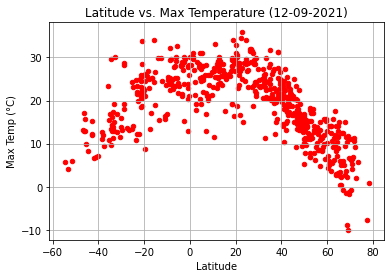

In [10]:
#Plot latitude vs Max Temperature
clean_weather_df.plot.scatter(x = 'Lat', y = 'Max Temp (°C)', marker='o', color='red')

#Graph details
plt.title("Latitude vs. Max Temperature (12-09-2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°C)")
plt.grid(True)

plt.savefig('../Images/Latitude_MaxTemperature_Plot.png')

The scatterplot above shows that the maximum temperature of each city increases as it approaches the equator(latitude=0). The maximum temperature of each city starts to decrease when it is further away from the equator.

## Latitude vs. Humidity Plot

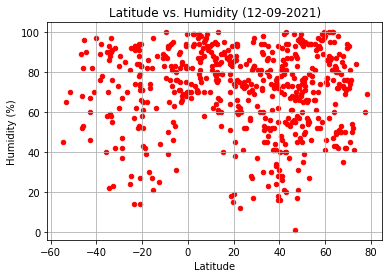

In [11]:
#Plot Latitude vs Humidity
clean_weather_df.plot.scatter(x = 'Lat', y = 'Humidity (%)', marker='o', color='red')

#Graph Details
plt.title("Latitude vs. Humidity (12-09-2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig('../Images/Latitude_Humidity_Plot.png')

From the scatterplot above, we can observe that the points(humidity of each city) are scattered all over the plot, with most cities having humidity of more than 60%. Latitude might not have a direct relationship with humidity but we will need to carry out further test such as Pearson correlation coefficient to check so.

## Latitude vs. Cloudiness Plot

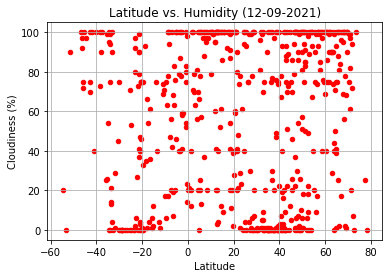

In [12]:
#Plot Latitude vs Cloudiness
clean_weather_df.plot.scatter(x = 'Lat', y = 'Cloudiness (%)', marker='o', color='red')

#Graph Details
plt.title("Latitude vs. Humidity (12-09-2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig('../Images/Latitude_Cloudiness_Plot.png')

From the scatterplot above, we can observe that the data points seem to be evenly distributed, suggesting the two varibales have no relationship. The latitude will not influence the cloudiness of a city.

## Latitude vs. Wind Speed Plot

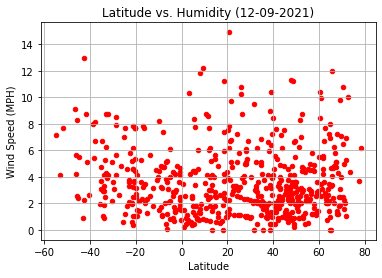

In [13]:
#Plot Latitude vs Wind Speed
clean_weather_df.plot.scatter(x = 'Lat', y = 'Wind Speed (MPH)', marker='o', color='red')

#Graph Details
plt.title("Latitude vs. Humidity (12-09-2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)

plt.savefig('../Images/Latitude_WindSpeed_Plot.png')

From the scatterplot above, we can observe that most of the cities have wind speed between 0MPH and 8MPH, with a few cities having higher wind speed.

## Linear Regression

In [14]:
#Create two separate df for Northern Hemisphere (greater than or equal to 0 degrees latitude) 
#and Southern Hemisphere (less than 0 degrees latitude)

north_hem_df = clean_weather_df.loc[weather_df["Lat"] >= 0]
south_hem_df = clean_weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6493813166897796


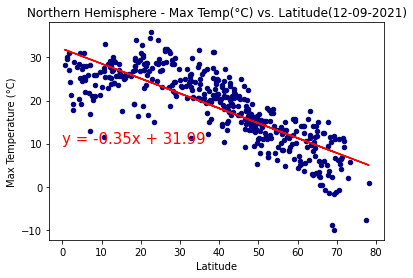

<Figure size 432x288 with 0 Axes>

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df['Lat'], north_hem_df['Max Temp (°C)'])
regress_values = north_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_hem_df.plot.scatter(x = 'Lat', y = 'Max Temp (°C)', marker='o', color='navy')
plt.plot(north_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp(°C) vs. Latitude(12-09-2021)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Northern_Hemisphere-Max_Temp_Latitude.png')

In the northern hemisphere, the maximum temperature of cities decrease when they are away from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4865770523717754


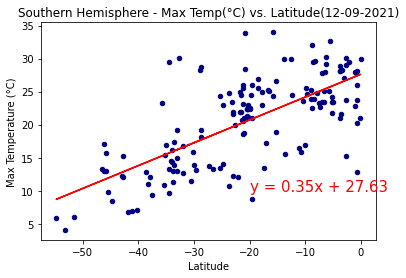

<Figure size 432x288 with 0 Axes>

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df['Lat'], south_hem_df['Max Temp (°C)'])
regress_values = south_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_hem_df.plot.scatter(x = 'Lat', y = 'Max Temp (°C)', marker='o', color='navy')
plt.plot(south_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp(°C) vs. Latitude(12-09-2021)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Southern_Hemisphere-Max_Temp_Latitude.png')

In the southern hemisphere, the maximum temperature of cities increase as they approach the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.015116003281481468


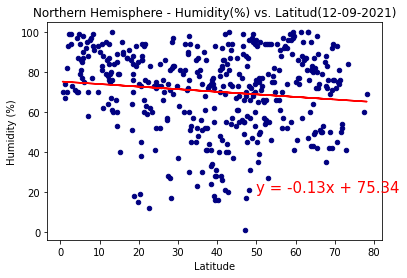

<Figure size 432x288 with 0 Axes>

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df['Lat'], north_hem_df['Humidity (%)'])
regress_values = north_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_hem_df.plot.scatter(x = 'Lat', y = 'Humidity (%)', marker='o', color='navy')
plt.plot(north_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitud(12-09-2021)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Northern_Hemisphere-Humidity_Latitude.png')

In the Northern hemisphere, there is no straight-line relationship between the two variables. The change of latitud will not affect the humidity of a city.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0073463036207938185


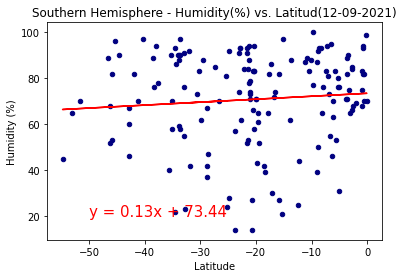

<Figure size 432x288 with 0 Axes>

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df['Lat'], south_hem_df['Humidity (%)'])
regress_values = south_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_hem_df.plot.scatter(x = 'Lat', y = 'Humidity (%)', marker='o', color='navy')
plt.plot(south_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitud(12-09-2021)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Southern_Hemisphere-Humidity_Latitude.png')

In the Southern hemisphere, there is no straight-line relationship or non-linear relationship between the two variables. The change of latitud will not affect the humidity of a city.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.000925526144640682


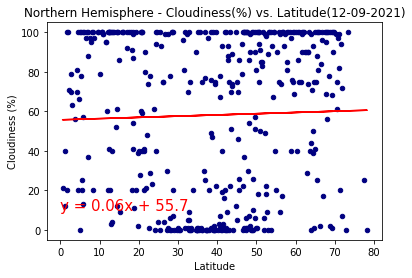

<Figure size 432x288 with 0 Axes>

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df['Lat'], north_hem_df['Cloudiness (%)'])
regress_values = north_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_hem_df.plot.scatter(x = 'Lat', y = 'Cloudiness (%)', marker='o', color='navy')
plt.plot(north_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude(12-09-2021)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Northern_Hemisphere-Cloudiness_Latitude.png')

In the Nothern hemisphere, the data points seem to be evenly distributed in the plot. There is no obvious straight-line relationship between the two variables, suggesting that the latitude will not influence the cloudiness of a city in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 8.23870972982941e-05


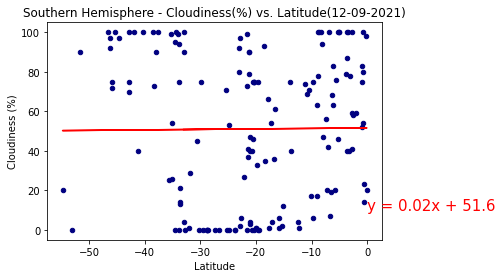

<Figure size 432x288 with 0 Axes>

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df['Lat'], south_hem_df['Cloudiness (%)'])
regress_values = south_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_hem_df.plot.scatter(x = 'Lat', y = 'Cloudiness (%)', marker='o', color='navy')
plt.plot(south_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude(12-09-2021)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Southern_Hemisphere-Cloudiness_Latitude.png')

In the Southern hemisphere, the data points seem to be evenly distributed in the plot. There is no obvious straight-line relationship between the two variables, suggesting that the latitude will not influence the cloudiness of a city in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0038619021145112503


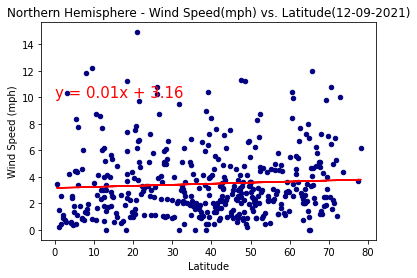

<Figure size 432x288 with 0 Axes>

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df['Lat'], north_hem_df['Wind Speed (MPH)'])
regress_values = north_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_hem_df.plot.scatter(x = 'Lat', y = 'Wind Speed (MPH)', marker='o', color='navy')
plt.plot(north_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude(12-09-2021)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Northern_Hemisphere-WindSpeed_Latitude.png')

In the Northern hemisphere, there is no straight-line relationship between the two variables, suggesting that the latitude will not influence the wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1282215779688698


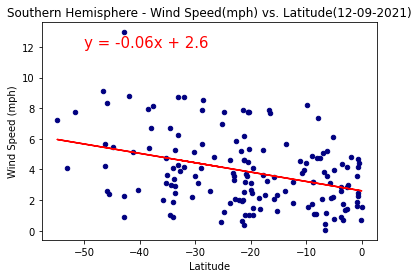

<Figure size 432x288 with 0 Axes>

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df['Lat'], south_hem_df['Wind Speed (MPH)'])
regress_values = south_hem_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_hem_df.plot.scatter(x = 'Lat', y = 'Wind Speed (MPH)', marker='o', color='navy')
plt.plot(south_hem_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude(12-09-2021)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

#Save the graph as png file and locate it in Images folder
plt.savefig('../Images/Southern_Hemisphere-WindSpeed_Latitude.png')

In the Southern hemisphere, there is no obvious straight-line relationship between the two variables, suggesting that the latitude will not influence the wind speed.